In [17]:
from rat import WeightsGenerator, NetworkExecuter, MouseLossFunction, get_data
import torch
from mouse_nes import make_torch_params, mean_to_params
from legacy.investigate_deviation_from_mean import generate_mean_lists
from tqdm.auto import tqdm
import numpy as np
import pickle

In [18]:
# E, I = get_data()
with open("data/data_1000_neurons2/responses.pkl", 'rb') as f:
    responses: torch.Tensor = pickle.load(f)
    E, I = responses[:800], responses[800:]
    responses = 0


In [3]:
# var = [1 for _ in range(12)]
# start_mean = [-8.054651081081644, -19.924301646902062, -0.0, -12.083112059245341, -6.591673732008658, 1.8571176252186712, -4.1588830833596715, 4.549042468104266, -167.03761889472233, -187.23627477210516, -143.08737747657977, -167.03761889472233]
# end_mean = [-0.054651081081644, -19.924301646902062, -0.0, -12.083112059245341, -6.591673732008658, 1.8571176252186712, -4.1588830833596715, 4.549042468104266, -167.03761889472233, -187.23627477210516, -143.08737747657977, -167.03761889472233]
# mean_lists = generate_mean_lists(start_mean, end_mean, 50)

In [4]:
# losses = []
# for mean_list in tqdm(mean_lists):
#     mean, cov = make_torch_params(mean_list, var)
#     J, P, w = mean_to_params(mean)
#     generator = WeightsGenerator(J, P, w, 1000)
#     W = generator.generate_weight_matrix()
#     tuning_curves, avg_step = executer.run_all_orientation_and_contrast(W)
#     loss, _ = loss_function.calculate_loss(E, tuning_curves[:800], I, tuning_curves[800:], avg_step)
#     losses.append(loss)

In [5]:
loss_function = MouseLossFunction()
executer = NetworkExecuter(1000)
var = [1 for _ in range(12)]

In [6]:
import matplotlib.pyplot as plt

In [7]:
# plt.plot(losses)

In [8]:
# percentage = 0.005
# upper_bound = losses[26] + losses[26] * percentage
# lower_bound = losses[26] - losses[26] * percentage
# print(upper_bound)
# print(lower_bound)

In [19]:
losses= []
sigmas = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 1, 5, 10]
# sigmas = np.linspace(0.0001, 0.001, 5)
for sigma in tqdm(sigmas):
    losses_for_one_sigma = []
    for i in tqdm(range(10)):
        mean_list = [-4.054651081081644, -19.924301646902062, -0.0, -12.083112059245341, -6.591673732008658, 1.8571176252186712, -4.1588830833596715, 4.549042468104266, -167.03761889472233, -187.23627477210516, -143.08737747657977, -167.03761889472233]
        val = np.random.randn() * sigma
        mean_list[0] += val
        mean, _ = make_torch_params(mean_list, var)
        J, P, w = mean_to_params(mean)
        generator = WeightsGenerator(J, P, w, 1000)
        W = generator.generate_weight_matrix()
        tuning_curves, avg_step = executer.run_all_orientation_and_contrast(W)
        loss, _ = loss_function.calculate_loss(E, tuning_curves[:800], I, tuning_curves[800:], avg_step)
        losses_for_one_sigma.append(loss)
    losses.append(losses_for_one_sigma)

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

/Users/paopao_ch/Documents/projects/v1_modelling/Mouse-V1-Pytorch/rat.py:177: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.J_parameters = torch.tensor(J_array, device=device)
/Users/paopao_ch/Documents/projects/v1_modelling/Mouse-V1-Pytorch/rat.py:178: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.P_parameters = torch.tensor(P_array, device=device)
/Users/paopao_ch/Documents/projects/v1_modelling/Mouse-V1-Pytorch/rat.py:179: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.w_parameters = torch.tensor(w_array, device=device)


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

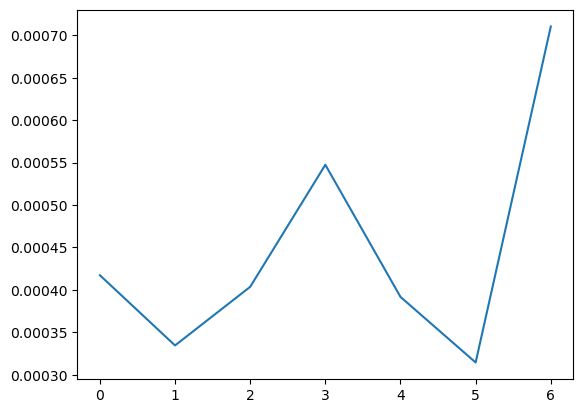

In [15]:
plt.plot(losses)

In [31]:
def _range(array: torch.Tensor):
    return np.max(np.array(array)) - np.min(np.array(array))

loss_ranges = []

for loss_array in losses:
    loss_ranges.append(_range(loss_array))

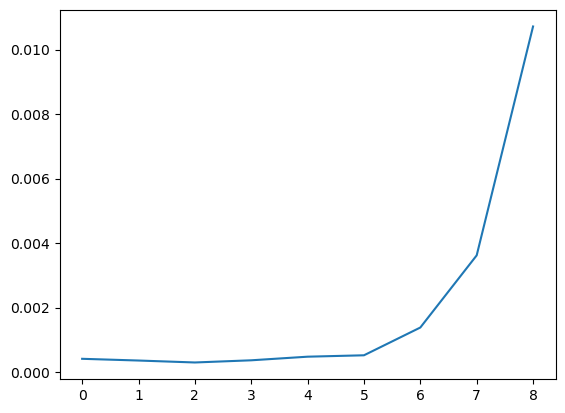

In [32]:
plt.plot(loss_ranges)

In [34]:
_range(losses[0]) * 10

0.00413152389228344

### Overall algorithm

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

/Users/paopao_ch/Documents/projects/v1_modelling/Mouse-V1-Pytorch/rat.py:177: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.J_parameters = torch.tensor(J_array, device=device)
/Users/paopao_ch/Documents/projects/v1_modelling/Mouse-V1-Pytorch/rat.py:178: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.P_parameters = torch.tensor(P_array, device=device)
/Users/paopao_ch/Documents/projects/v1_modelling/Mouse-V1-Pytorch/rat.py:179: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.w_parameters = torch.tensor(w_array, device=device)


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

0.005666408687829971


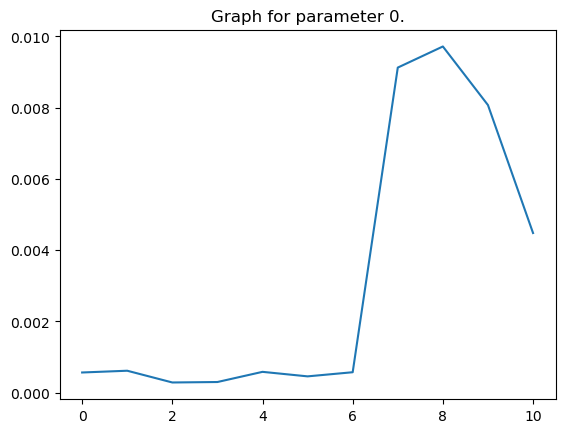

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

0.004918593913316727


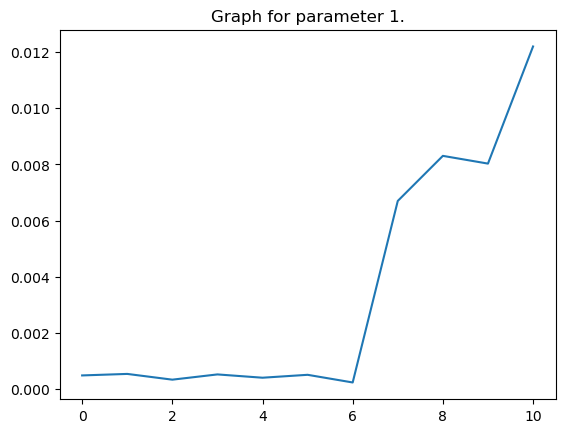

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

0.005939323455095291


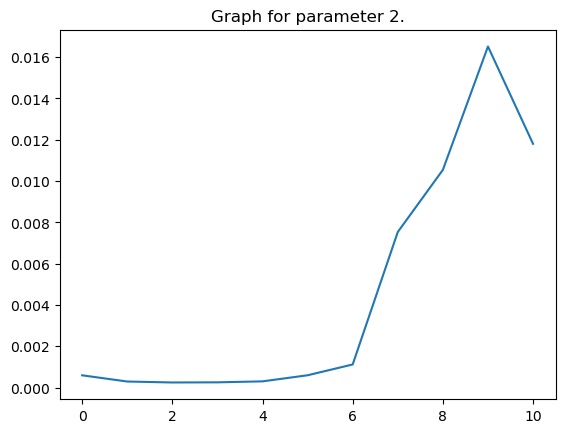

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

0.007118247449398041


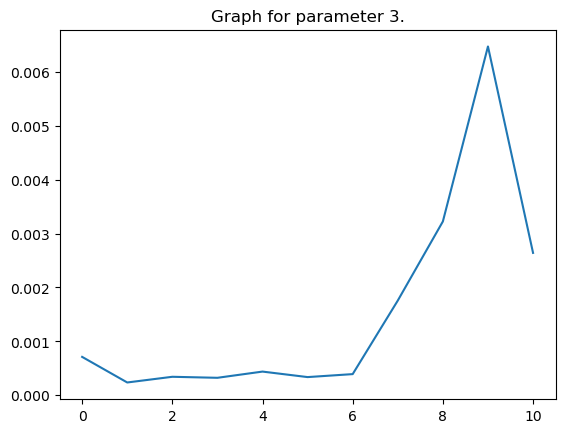

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

0.0035581830888986588


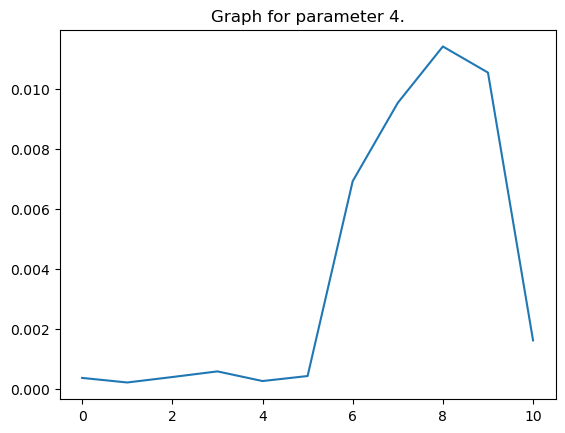

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

0.0035964231938123703


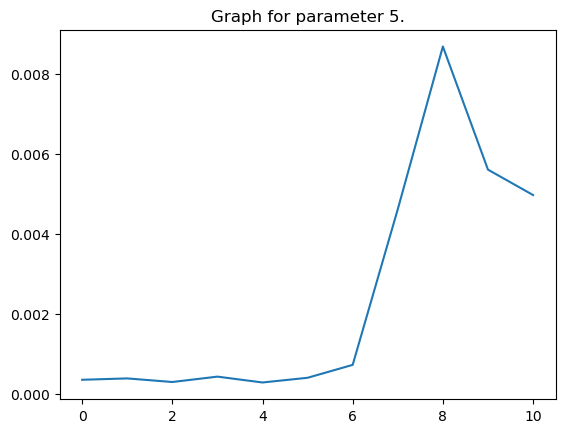

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

0.0036222487688064575


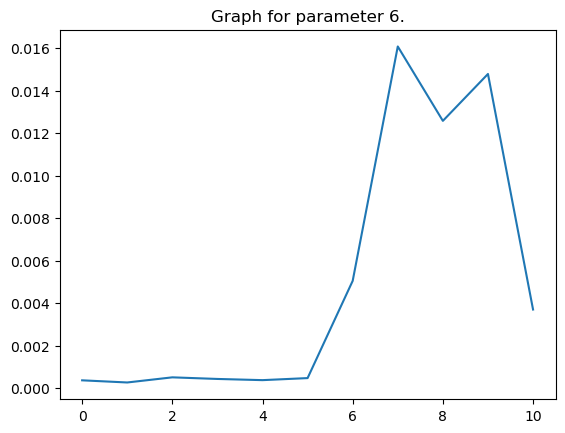

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

0.00514608807861805


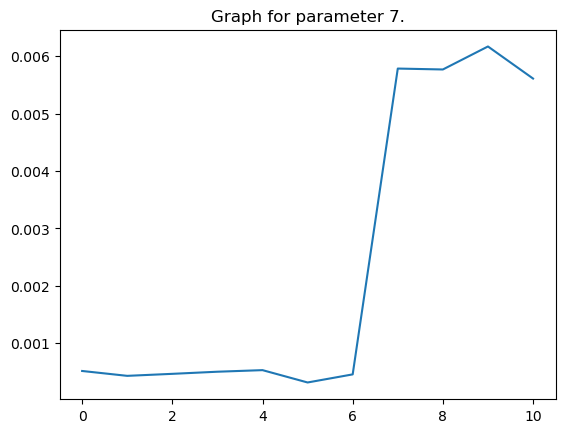

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

0.004171617329120636


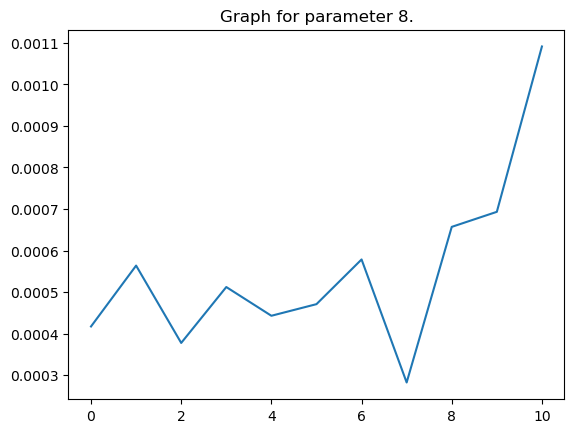

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

0.0035387836396694183


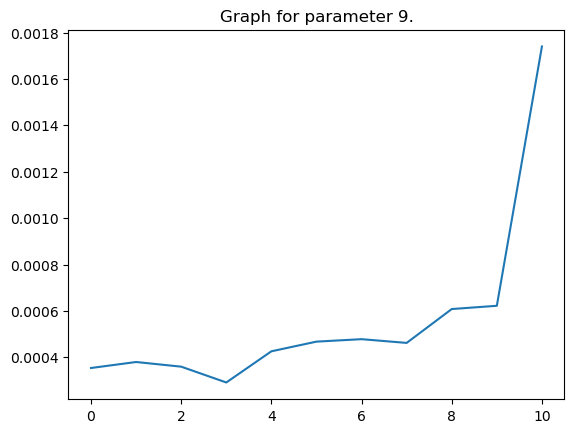

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

0.004327008500695229


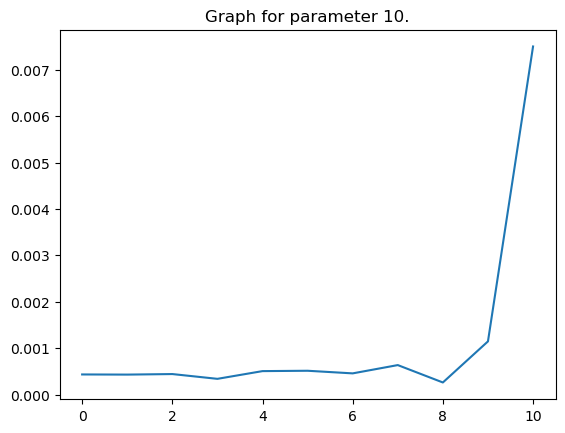

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

0.006962381303310394


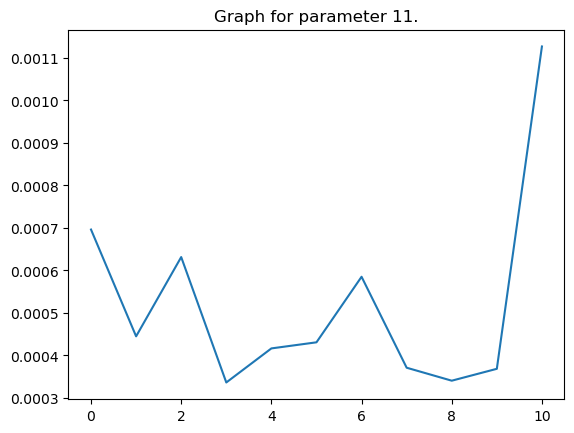

In [35]:
temp = []
for xi in range(12):
    losses = []
    sigmas = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 1, 5, 10, 50, 100]
    for sigma in tqdm(sigmas):
        losses_for_one_sigma = []
        for i in tqdm(range(10)):
            mean_list = [-4.054651081081644, -19.924301646902062, -0.0, -12.083112059245341, -6.591673732008658, 1.8571176252186712, -4.1588830833596715, 4.549042468104266, -167.03761889472233, -187.23627477210516, -143.08737747657977, -167.03761889472233]
            val = np.random.randn() * sigma
            mean_list[xi] += val
            mean, _ = make_torch_params(mean_list, var)
            J, P, w = mean_to_params(mean)
            generator = WeightsGenerator(J, P, w, 1000)
            W = generator.generate_weight_matrix()
            tuning_curves, avg_step = executer.run_all_orientation_and_contrast(W)
            loss, _ = loss_function.calculate_loss(E, tuning_curves[:800], I, tuning_curves[800:], avg_step)
            losses_for_one_sigma.append(loss)
        losses.append(losses_for_one_sigma)
    
    loss_ranges = []

    for loss_array in losses:
        loss_ranges.append(_range(loss_array))
    
    print(_range(losses[0]) * 10)
    
    plt.plot(loss_ranges)
    plt.title(f"Graph for parameter {xi}.")
    plt.show()
    temp.append(losses)

# TODO: Change this to a better search algorithm

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

/Users/paopao_ch/Documents/projects/v1_modelling/Mouse-V1-Pytorch/rat.py:177: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.J_parameters = torch.tensor(J_array, device=device)
/Users/paopao_ch/Documents/projects/v1_modelling/Mouse-V1-Pytorch/rat.py:178: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.P_parameters = torch.tensor(P_array, device=device)
/Users/paopao_ch/Documents/projects/v1_modelling/Mouse-V1-Pytorch/rat.py:179: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.w_parameters = torch.tensor(w_array, device=device)


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

0.0044314563274383545


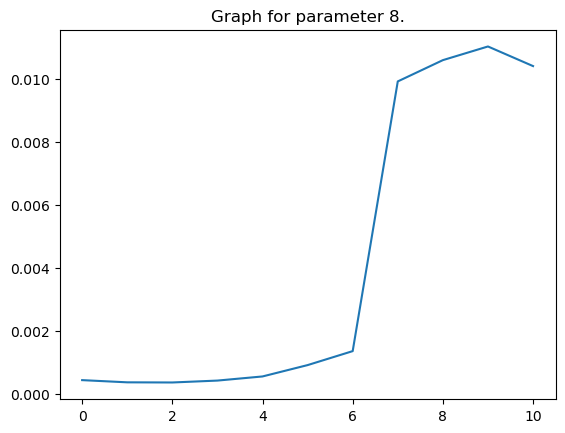

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

0.00400482676923275


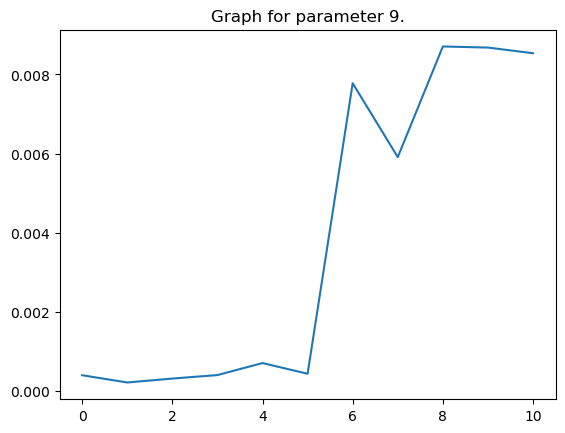

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

0.00421721488237381


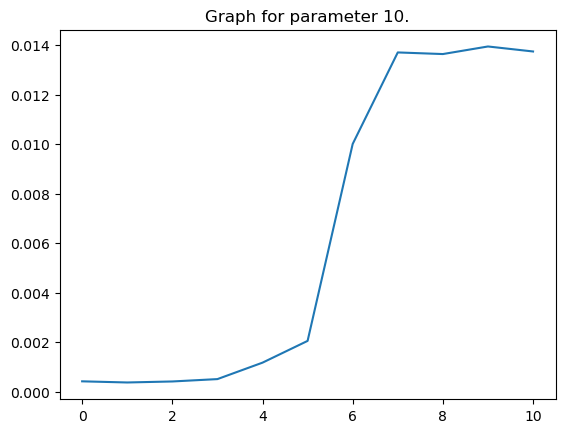

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

0.004454553127288818


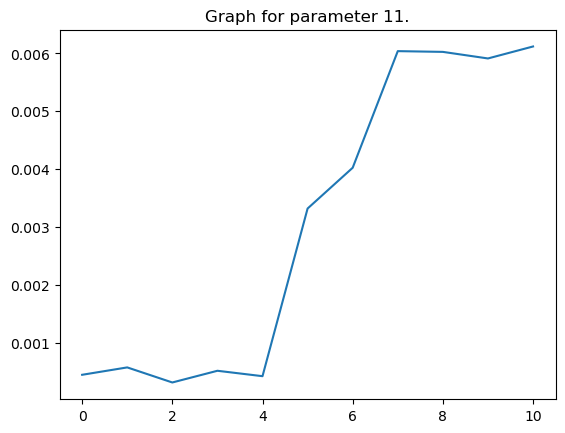

In [37]:
temp2 = []
for xi in range(8, 12, 1):
    losses = []
    sigmas = [0.0001, 1, 5, 10, 50, 100, 250, 500, 750, 1000, 5000]
    for sigma in tqdm(sigmas):
        losses_for_one_sigma = []
        for i in tqdm(range(10)):
            mean_list = [-4.054651081081644, -19.924301646902062, -0.0, -12.083112059245341, -6.591673732008658, 1.8571176252186712, -4.1588830833596715, 4.549042468104266, -167.03761889472233, -187.23627477210516, -143.08737747657977, -167.03761889472233]
            val = np.random.randn() * sigma
            mean_list[xi] += val
            mean, _ = make_torch_params(mean_list, var)
            J, P, w = mean_to_params(mean)
            generator = WeightsGenerator(J, P, w, 1000)
            W = generator.generate_weight_matrix()
            tuning_curves, avg_step = executer.run_all_orientation_and_contrast(W)
            loss, _ = loss_function.calculate_loss(E, tuning_curves[:800], I, tuning_curves[800:], avg_step)
            losses_for_one_sigma.append(loss)
        losses.append(losses_for_one_sigma)
    
    loss_ranges = []

    for loss_array in losses:
        loss_ranges.append(_range(loss_array))
    
    print(_range(losses[0]) * 10)
    
    plt.plot(loss_ranges)
    plt.title(f"Graph for parameter {xi}.")
    plt.show()
    temp2.append(losses)

# TODO: Change this to a better search algorithm

In [ ]:
# FOUND COVVARIANCE MATRIX

var = [5, 5, 5, 5, 1, 1, 1, 1, 250, 250, 250, 250]